In [1]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

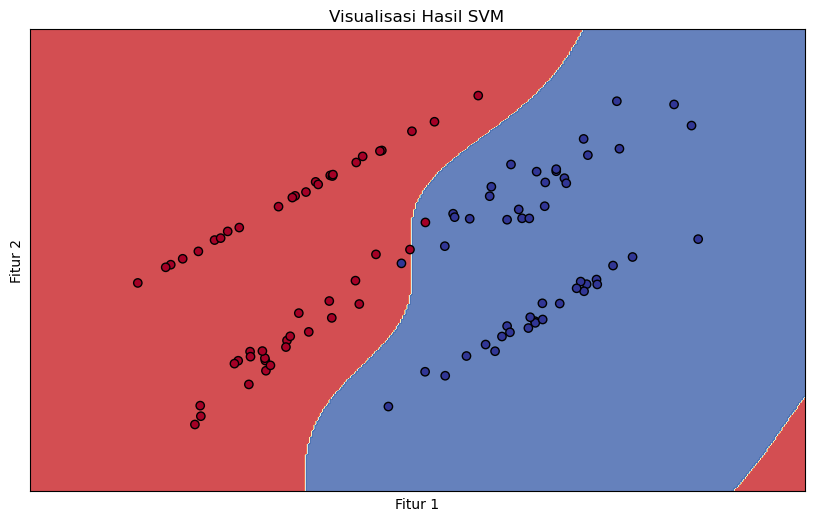

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Membuat data sintetis untuk contoh
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Melatih model SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

# Membuat mesh grid untuk memvisualkan area keputusan
h = 0.02  # Ukuran langkah grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Mengklasifikasikan setiap titik dalam mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Visualisasi Hasil SVM')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [11]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

NameError: name 'pd' is not defined

In [4]:
pd.value_counts(df['Label'])

negatif    5585
positif    4142
netral     2482
Name: Label, dtype: int64

In [10]:
df_negatif = df[ (df['Label'] == 'negatif')]
df_netral = df[ (df['Label'] == 'netral')]
df_positif = df[ (df['Label'] == 'positif')]
                 
#convert to list
negatif_list=df_negatif['Steming'].tolist()
positif_list= df_positif['Steming'].tolist()
netral_list= df_netral['Steming'].tolist()

#convert the list into a string of spam
filtered_negatif = ("").join(str(negatif_list)) 
filtered_positif = ("").join(str(positif_list))
filtered_netral = ("").join(str(netral_list))

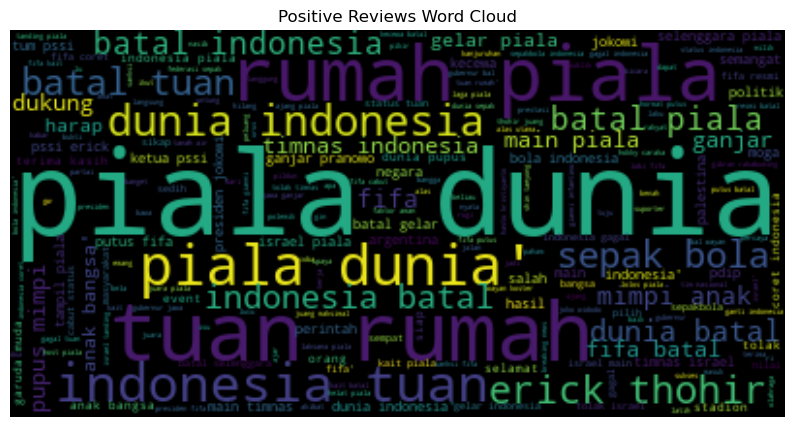

In [12]:
#Word Cloud Positive
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "black").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

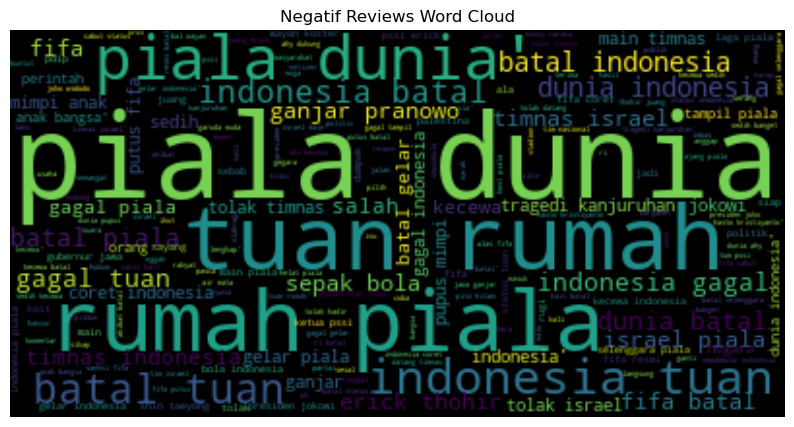

In [14]:
#Word Cloud negative
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "black").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Reviews Word Cloud")
plt.show()

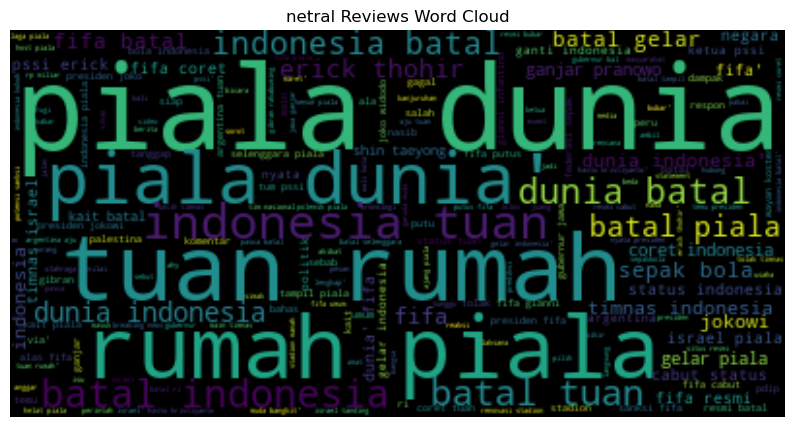

In [15]:
#Word Cloud Netral

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "black").generate(filtered_netral)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("netral Reviews Word Cloud")
plt.show()